In [1]:
#importing library and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import seaborn as sns

# **Objective**
> We will work with the **Diabetes Simple Diagnosis** dataset, which has information related to the patient's health as a way to predict the risk of diabetes. The objective is to **create a model that predicts if a patient has been diagnosed with diabetes or not**. 

In [2]:
#importing dataset
df = pd.read_csv('/kaggle/input/diabetes-simple-diagnosis/Diabetes Simple Diagnosis.csv')
df.head(5)

,Unnamed: 0,Age,Gender,BMI,High_BP,FBS,HbA1c_level,Smoking,Diagnosis
0,0,80,Female,25,0,140,6.6,0,0
1,1,54,Female,27,0,80,6.6,0,0
2,2,28,Male,27,0,158,5.7,0,0
3,3,36,Female,23,0,155,5.0,1,0
4,4,76,Male,20,1,155,4.8,1,0


# **Variables dataset information**
* **Age**: Represents the age of the patient in years. Age can be a risk factor for diabetes, as the risk of diabetes increases with age.

* **Gender**: Indicates the gender of the patient, which can be a factor in the prediction of diabetes. Some studies suggest that women may have a different risk than men in developing diabetes.

* **Body Mass Index (BMI)**: BMI is a measure that uses a person's height and weight to determine whether they are in the normal weight, overweight, or obese category. A high BMI is associated with a higher risk of diabetes.

* **High Blood Pressure (High_BP)**: An indicator of whether or not a patient suffers from high blood pressure. High blood pressure is a significant risk factor for type 2 diabetes.

* **Fasting Blood Glucose (FBS)**: Represents the level of glucose in the blood after an overnight fast. Elevated fasting blood sugar levels may indicate a risk of diabetes or prediabetes.

* **HbA1c (HbA1c_level)**: A measurement of the average blood sugar level over the last 2-3 months. It is an important indicator for diabetes diagnosis and management.

* **Smoking**: Indicates whether the patient smokes or not. Smoking can be an additional risk factor for type 2 diabetes.

* **Diagonisis**: An indicator that someone has diabetes.

In [3]:
#checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88380 entries, 0 to 88379
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   88380 non-null  int64  
 1   Age          88380 non-null  int64  
 2   Gender       88380 non-null  object 
 3   BMI          88380 non-null  int64  
 4   High_BP      88380 non-null  int64  
 5   FBS          88380 non-null  int64  
 6   HbA1c_level  88380 non-null  float64
 7   Smoking      88380 non-null  int64  
 8   Diagnosis    88380 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 6.1+ MB


# **Exploratory analysis**
> In this step we will check general information about the base, the
  types of variables, null values, size of the dataset, cardinality of the data, etc.

In [4]:
#renamig the first column
df.rename(columns={'Unnamed: 0':'Id'}, inplace=True)
df.head(5)

,Id,Age,Gender,BMI,High_BP,FBS,HbA1c_level,Smoking,Diagnosis
0,0,80,Female,25,0,140,6.6,0,0
1,1,54,Female,27,0,80,6.6,0,0
2,2,28,Male,27,0,158,5.7,0,0
3,3,36,Female,23,0,155,5.0,1,0
4,4,76,Male,20,1,155,4.8,1,0


In [5]:
#checking variables types
df.dtypes

Id               int64
Age              int64
Gender          object
BMI              int64
High_BP          int64
FBS              int64
HbA1c_level    float64
Smoking          int64
Diagnosis        int64
dtype: object

In [6]:
#checking nulls values
df.isnull().sum()

Id             0
Age            0
Gender         0
BMI            0
High_BP        0
FBS            0
HbA1c_level    0
Smoking        0
Diagnosis      0
dtype: int64

In [7]:
#checking dataset shape
df.shape

(88380, 9)

In [8]:
#checking dataset cardinality
df.nunique().sort_values(ascending=False)

Id             88380
Age               81
BMI               72
HbA1c_level       27
FBS               20
Gender             3
High_BP            2
Smoking            2
Diagnosis          2
dtype: int64

In [9]:
#checking object columns in dataset
df.columns[df.dtypes == 'object']

Index(['Gender'], dtype='object')

In [10]:
#checking values in Gender column
df.Gender.value_counts()

Gender
Female    51346
Male      37016
Other        18
Name: count, dtype: int64

# **Data pre processing**
> At this stage, we will deal with categorical variables, deal with numerical variables by normalizing the values. After that we define what the explanatory variable and the target variable will be.

In [11]:
#processing categoric variable
df_gender = pd.get_dummies(df.Gender, dtype='int')
df_gender.head(5)

,Female,Male,Other
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0


In [12]:
#concatenating the result
df = pd.concat([df, df_gender], axis=1)
df.head(5)

,Id,Age,Gender,BMI,High_BP,FBS,HbA1c_level,Smoking,Diagnosis,Female,Male,Other
0,0,80,Female,25,0,140,6.6,0,0,1,0,0
1,1,54,Female,27,0,80,6.6,0,0,1,0,0
2,2,28,Male,27,0,158,5.7,0,0,0,1,0
3,3,36,Female,23,0,155,5.0,1,0,1,0,0
4,4,76,Male,20,1,155,4.8,1,0,0,1,0


In [13]:
#checking result
df[['Gender','Female','Male','Other']].value_counts()

Gender  Female  Male  Other
Female  1       0     0        51346
Male    0       1     0        37016
Other   0       0     1           18
Name: count, dtype: int64

In [14]:
#creating the scaler
transformer = RobustScaler().fit(df[['Age','BMI','FBS','HbA1c_level']])

In [15]:
#applying the transformation
df[['Age_scaler','BMI_scaler','FBS_scaler','HbA1c_level_scaler']] = transformer.transform(df[['Age','BMI','FBS','HbA1c_level']])

In [16]:
#viewing the dataset after all transformations
df.head(5)

,Id,Age,Gender,BMI,High_BP,FBS,HbA1c_level,Smoking,Diagnosis,Female,Male,Other,Age_scaler,BMI_scaler,FBS_scaler,HbA1c_level_scaler
0,0,80,Female,25,0,140,6.6,0,0,1,0,0,1.027778,-0.285714,0.000000,0.571429
1,1,54,Female,27,0,80,6.6,0,0,1,0,0,0.305556,0.000000,-1.016949,0.571429
2,2,28,Male,27,0,158,5.7,0,0,0,1,0,-0.416667,0.000000,0.305085,-0.071429
3,3,36,Female,23,0,155,5.0,1,0,1,0,0,-0.194444,-0.571429,0.254237,-0.571429
4,4,76,Male,20,1,155,4.8,1,0,0,1,0,0.916667,-1.000000,0.254237,-0.714286


In [17]:
#creating an explanatory variable
X = df.drop(['Id','Gender','Age','BMI','FBS','HbA1c_level','Diagnosis'], axis=1)
X.head(5)

,High_BP,Smoking,Female,Male,Other,Age_scaler,BMI_scaler,FBS_scaler,HbA1c_level_scaler
0,0,0,1,0,0,1.027778,-0.285714,0.000000,0.571429
1,0,0,1,0,0,0.305556,0.000000,-1.016949,0.571429
2,0,0,0,1,0,-0.416667,0.000000,0.305085,-0.071429
3,0,1,1,0,0,-0.194444,-0.571429,0.254237,-0.571429
4,1,1,0,1,0,0.916667,-1.000000,0.254237,-0.714286


In [18]:
#creating a response variable
y = df.Diagnosis
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Diagnosis, dtype: int64

# **Training model**
> In this other stage, we will begin developing the model. First, we divided our dataset into training, validation and testing. Then we create our classifiers and train our model on the training data. After that, we validate it on the validation data.

In [19]:
#separating the dataset in training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#separating the dataset in training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [21]:
##creating the classifier decision tree, knn, logistic regression
clf_dt = tree.DecisionTreeClassifier(random_state=42)
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_lr = LogisticRegression(random_state=42, max_iter=1000)

In [22]:
#fitting the train data
clf_dt_temp = clf_dt.fit(X_train, y_train)
clf_knn_temp = clf_knn.fit(X_train, y_train)
clf_lr_temp = clf_lr.fit(X_train, y_train)

In [23]:
#predicting the validation data
y_pred_dt = clf_dt_temp.predict(X_val)
y_pred_knn = clf_knn_temp.predict(X_val)
y_pred_lr = clf_lr_temp.predict(X_val)

In [24]:
#checking the accuracy of predictions
accuracy_score_dt = accuracy_score(y_val, y_pred_dt)
accuracy_score_knn = accuracy_score(y_val, y_pred_knn)
accuracy_score_lr = accuracy_score(y_val, y_pred_lr)

accuracy_score_dt, accuracy_score_knn, accuracy_score_lr

(0.9410225585177852, 0.9550951134997525, 0.953822219079273)

# **Analyzing results**
> We validated the 3 models and the one that showed the best results was KNN, with an accuracy of 95.5%. The others were not so far from this result.

In [25]:
#creating a dataframe to display the results
df_result = pd.DataFrame({
    'Models': ['DecisionTree','KNN', 'LogisticRegression'],
    'Initial': [accuracy_score_dt, accuracy_score_knn, accuracy_score_lr]
})
df_result

,Models,Initial
0,DecisionTree,0.941023
1,KNN,0.955095
2,LogisticRegression,0.953822


# **New exploratory analysis**
> However, although our result was not bad, we will try to improve it, we will analyze our database again and see if we can make any changes that improve the performance of our models.

In [26]:
#viewing the current dataframe
df.head(5)

,Id,Age,Gender,BMI,High_BP,FBS,HbA1c_level,Smoking,Diagnosis,Female,Male,Other,Age_scaler,BMI_scaler,FBS_scaler,HbA1c_level_scaler
0,0,80,Female,25,0,140,6.6,0,0,1,0,0,1.027778,-0.285714,0.000000,0.571429
1,1,54,Female,27,0,80,6.6,0,0,1,0,0,0.305556,0.000000,-1.016949,0.571429
2,2,28,Male,27,0,158,5.7,0,0,0,1,0,-0.416667,0.000000,0.305085,-0.071429
3,3,36,Female,23,0,155,5.0,1,0,1,0,0,-0.194444,-0.571429,0.254237,-0.571429
4,4,76,Male,20,1,155,4.8,1,0,0,1,0,0.916667,-1.000000,0.254237,-0.714286


In [27]:
#analyzing the relation between the age variable and the target variable
df.groupby('Age')['Diagnosis'].agg(['sum','count','mean']).reset_index()

,Age,sum,count,mean
0,0,0,774,0.000000
1,1,0,979,0.000000
2,2,0,965,0.000000
3,3,1,853,0.001172
4,4,6,792,0.007576
...,...,...,...,...
76,76,147,702,0.209402
77,77,135,700,0.192857
78,78,135,655,0.206107
79,79,140,581,0.240964


In [28]:
#checking the correlation
df[['Age','Diagnosis']].corr()

,Age,Diagnosis
Age,1.000000,0.270918
Diagnosis,0.270918,1.000000


* children:  < 12
* teenagers: 12 > 19
* young adult: 19 > 30
* adult: 30 > 60
* young elderly: 60 > 80
* elderly: 80 > 110


In [29]:
# condition to create categories according to age
def condition(x):
    if x <= 12:
        return 0#'children'
    elif 12 < x <= 19:
        return 1#'teenager'
    elif 19 < x <= 29:
        return 2#'young adult'
    elif 30 < x <= 59:
        return 3#'adult'
    elif 60 < x <=80:
        return 4#'young elderly'
    else:
        return 5#'elderly'

In [30]:
#applying the condition
df['Age_range'] = df['Age'].apply(condition)
df

,Id,Age,Gender,BMI,High_BP,FBS,HbA1c_level,Smoking,Diagnosis,Female,Male,Other,Age_scaler,BMI_scaler,FBS_scaler,HbA1c_level_scaler,Age_range
0,0,80,Female,25,0,140,6.6,0,0,1,0,0,1.027778,-0.285714,0.000000,0.571429,4
1,1,54,Female,27,0,80,6.6,0,0,1,0,0,0.305556,0.000000,-1.016949,0.571429,3
2,2,28,Male,27,0,158,5.7,0,0,0,1,0,-0.416667,0.000000,0.305085,-0.071429,2
3,3,36,Female,23,0,155,5.0,1,0,1,0,0,-0.194444,-0.571429,0.254237,-0.571429,3
4,4,76,Male,20,1,155,4.8,1,0,0,1,0,0.916667,-1.000000,0.254237,-0.714286,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88375,88375,17,Female,15,0,100,5.7,1,1,1,0,0,-0.722222,-1.714286,-0.677966,-0.071429,1
88376,88376,22,Male,19,0,120,6.4,1,1,0,1,0,-0.583333,-1.142857,-0.338983,0.428571,2
88377,88377,27,Female,24,1,140,7.1,1,1,1,0,0,-0.444444,-0.428571,0.000000,0.928571,2
88378,88378,32,Male,29,1,160,7.8,1,1,0,1,0,-0.305556,0.285714,0.338983,1.428571,3


In [31]:
#creating an explanatory variable
X = df.drop(['Id','Gender','Age','Age_scaler','BMI','FBS','HbA1c_level','Diagnosis'], axis=1)

#creating a response variable
y = df.Diagnosis

X.head(5)

,High_BP,Smoking,Female,Male,Other,BMI_scaler,FBS_scaler,HbA1c_level_scaler,Age_range
0,0,0,1,0,0,-0.285714,0.000000,0.571429,4
1,0,0,1,0,0,0.000000,-1.016949,0.571429,3
2,0,0,0,1,0,0.000000,0.305085,-0.071429,2
3,0,1,1,0,0,-0.571429,0.254237,-0.571429,3
4,1,1,0,1,0,-1.000000,0.254237,-0.714286,4


# **New training model**
> We will follow the same previous step but with the new changes in our dataset.Split the dataset, train the model, validate and analyze the results.

In [32]:

#separating the dataset in training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#separating the dataset in training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#fitting the train data
clf_dt_temp = clf_dt.fit(X_train, y_train)
clf_knn_temp = clf_knn.fit(X_train, y_train)
clf_lr_temp = clf_lr.fit(X_train, y_train)

#predicting the validation data
y_pred_dt = clf_dt_temp.predict(X_val)
y_pred_knn = clf_knn_temp.predict(X_val)
y_pred_lr = clf_lr_temp.predict(X_val)

#checking the accuracy of predictions
accuracy_score_dt = accuracy_score(y_val, y_pred_dt)
accuracy_score_knn = accuracy_score(y_val, y_pred_knn)
accuracy_score_lr = accuracy_score(y_val, y_pred_lr)

print(accuracy_score_dt, accuracy_score_knn, accuracy_score_lr)
    

0.9516300120217807 0.9523371755887137 0.9523371755887137


# **Analyzing results 2**
> We had a small worsening in the KNN and Logistic Regression results, and an improvement in the Decision Tree results. Therefore, the new changes were not very effective for our overall result.

In [33]:
#adding predicted values to the result dataset
df_result['Age_range'] = [accuracy_score_dt, accuracy_score_knn, accuracy_score_lr]
df_result

,Models,Initial,Age_range
0,DecisionTree,0.941023,0.951630
1,KNN,0.955095,0.952337
2,LogisticRegression,0.953822,0.952337


# **New exploratory analysis again**
> Again, we will analyze our dataset to identify opportunities

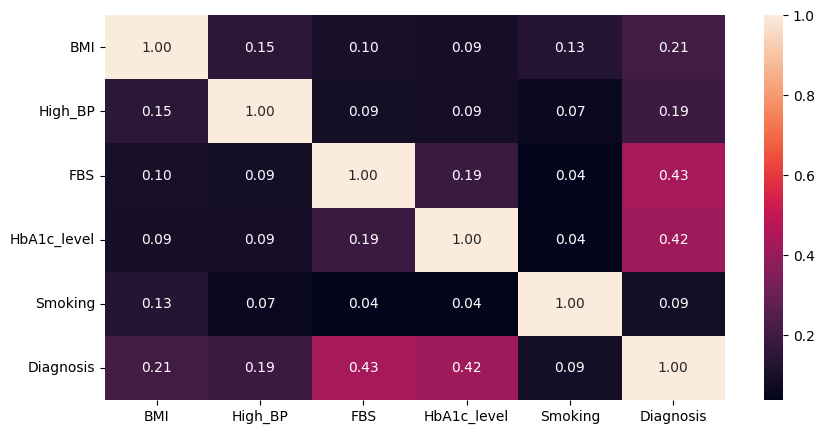

In [34]:
#checking the correlation of the main variables
corr = df[['BMI', 'High_BP', 'FBS', 'HbA1c_level',
           'Smoking', 'Diagnosis']].corr()

fig, ax = plt.subplots(figsize=(10,5))

sns.heatmap(corr, annot=True, fmt='.2f')

plt.show()

In [35]:
df.groupby('BMI')['Diagnosis'].agg(['sum','count','mean']).reset_index()

,BMI,sum,count,mean
0,10,2,28,0.071429
1,11,3,57,0.052632
2,12,1,116,0.008621
3,13,5,325,0.015385
4,14,4,836,0.004785
...,...,...,...,...
67,83,1,1,1.000000
68,87,0,2,0.000000
69,88,1,2,0.500000
70,91,0,1,0.000000


In [36]:
# condition to create categories according to BMI
def condition_BMI(x):
    if x >= 30:
        return 1
    else:
        return 0

In [37]:
#applying the condition
df['BMI_range'] = df['BMI'].apply(condition_BMI)
df

,Id,Age,Gender,BMI,High_BP,FBS,HbA1c_level,Smoking,Diagnosis,Female,Male,Other,Age_scaler,BMI_scaler,FBS_scaler,HbA1c_level_scaler,Age_range,BMI_range
0,0,80,Female,25,0,140,6.6,0,0,1,0,0,1.027778,-0.285714,0.000000,0.571429,4,0
1,1,54,Female,27,0,80,6.6,0,0,1,0,0,0.305556,0.000000,-1.016949,0.571429,3,0
2,2,28,Male,27,0,158,5.7,0,0,0,1,0,-0.416667,0.000000,0.305085,-0.071429,2,0
3,3,36,Female,23,0,155,5.0,1,0,1,0,0,-0.194444,-0.571429,0.254237,-0.571429,3,0
4,4,76,Male,20,1,155,4.8,1,0,0,1,0,0.916667,-1.000000,0.254237,-0.714286,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88375,88375,17,Female,15,0,100,5.7,1,1,1,0,0,-0.722222,-1.714286,-0.677966,-0.071429,1,0
88376,88376,22,Male,19,0,120,6.4,1,1,0,1,0,-0.583333,-1.142857,-0.338983,0.428571,2,0
88377,88377,27,Female,24,1,140,7.1,1,1,1,0,0,-0.444444,-0.428571,0.000000,0.928571,2,0
88378,88378,32,Male,29,1,160,7.8,1,1,0,1,0,-0.305556,0.285714,0.338983,1.428571,3,0


In [38]:
#creating an explanatory variable
X = df.drop(['Id','Gender','Age','Age_scaler','BMI','BMI_scaler','FBS','HbA1c_level','Diagnosis'], axis=1)
#creating a response variable
y = df.Diagnosis
X.head(5)

,High_BP,Smoking,Female,Male,Other,FBS_scaler,HbA1c_level_scaler,Age_range,BMI_range
0,0,0,1,0,0,0.000000,0.571429,4,0
1,0,0,1,0,0,-1.016949,0.571429,3,0
2,0,0,0,1,0,0.305085,-0.071429,2,0
3,0,1,1,0,0,0.254237,-0.571429,3,0
4,1,1,0,1,0,0.254237,-0.714286,4,0


# **New training model again**
> And again we will split our dataset, train the model, validate and analyze the results.

In [39]:
#separating the dataset in training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#separating the dataset in training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#fitting the train data
clf_dt_temp = clf_dt.fit(X_train, y_train)
clf_knn_temp = clf_knn.fit(X_train, y_train)
clf_lr_temp = clf_lr.fit(X_train, y_train)

#predicting the validation data
y_pred_dt = clf_dt_temp.predict(X_val)
y_pred_knn = clf_knn_temp.predict(X_val)
y_pred_lr = clf_lr_temp.predict(X_val)

#checking the accuracy of predictions
accuracy_score_dt = accuracy_score(y_val, y_pred_dt)
accuracy_score_knn = accuracy_score(y_val, y_pred_knn)
accuracy_score_lr = accuracy_score(y_val, y_pred_lr)

print(accuracy_score_dt, accuracy_score_knn, accuracy_score_lr)

0.9619546000990029 0.9562972915635386 0.9516300120217807


# **Analyzing results 3**
> In this last change, we had a considerable improvement in the Decision Tree, with the highest value found so far of 96%. I believe we can proceed to do our final test by applying this model to our test dataset.

In [40]:
#adding predicted values to the result dataset
df_result['BMI_morethan30'] = [accuracy_score_dt, accuracy_score_knn, accuracy_score_lr]
df_result

,Models,Initial,Age_range,BMI_morethan30
0,DecisionTree,0.941023,0.951630,0.961955
1,KNN,0.955095,0.952337,0.956297
2,LogisticRegression,0.953822,0.952337,0.951630


# **Final results**
> Applying the decision tree model to our test dataset

In [41]:
#predicting the test data (Decision Tree model)
y_pred = clf_dt_temp.predict(X_test)

In [42]:
#checking the accuracy of prediction
accuracy_score_y = accuracy_score(y_test, y_pred)
accuracy_score_y

0.9643584521384929